In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from collections import Counter

In [6]:
# FIRST LET US GET THE DATA
dataset=datasets.load_breast_cancer()

In [8]:
# THE DATA AND FEATURES
X=dataset.data

In [9]:
y=dataset.target

In [10]:
X# THIS IS IN TYPE OF 2 -D ARRAY

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [12]:
# LET US BUILD OUR OWN ALGORITHM FROM SCRATCH 

In [13]:
#IN KNN WHAT HAPPENS IS, WE DON T CALL THE TRAIN FUNCTION EXPLICITLY WHAT WE DO IS WE WILL COMPARE THE TEST DATA WITH 
# ALL THE TRAINING POINTS WHICHEVER WILL BE CLOSE FOR THAT, ON THE BASIS OF MAJORITY VOTE THAT WILL BE SELECTED

In [16]:
# BEFORE DOING ANYTHING LET US SPLIT THE DATA
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=0)

In [17]:
# NOW LET US WRITE THE FIT FUNCTION, BUT WE DONT WANT IN KNN, AS THE REASON IS MENTIONED ABOVE
def fit(X_train,Y_train):
    return

In [18]:
# FOR THE PREDICT FUNCTION WHAT WE DO IS WE WILL TAKE X_train and Y_train

In [46]:
def single_predict_point(X_train,Y_train,x):
    # I WILL STORE ALL THE DISTANCE AND THEIR ROW IN TERMS OF NESTED LISTS
    distance=[]
    # WE HAVE TO ITERATE THROUGH THE X_train IN A SINGLE HANDED
    for i in range(len(X_train)):
        # AS IT IS IN THE FORM OF NUMPY WHAT WE CAN DO IS WE CAN SIMPLY DO 
        dis=(((X_train[i,:]-x)**2).sum())**1/2
        #NOW YOU APPEND dis and THE ROW(i)
        distance.append([dis,i])
    #NOW WE HAVE ALL THE DISTANCES WITH RESPECT TO EACH ROW IN THE DISTANCE LIST
    # WHAT WE DO WE WILL SORT IT FIRST AS THE MINIUMUM DISTANCE HAVE TO BE
    distance=sorted(distance)
    # IT WILL BE SORTED BASED ON THE FIRST
    # NOW WE WILL GET ALL THE TARGET OF THAT RESPECTIVE ROW
    target=[]
    k=7
    # LET ME CONSIDER K AS 7[AS OF NOW],.....IT CAN BE APPLIED TO ANY NUMBER OF K VALUE
    for i in range(k):
        indexx=distance[i][1]
        value=Y_train[indexx]
        target.append(value)
    #NOW YOU HAVE 7 NEAREST NEIGHBOUR WITH ITS TARGET,NOW WHICH EVER VALUE HAS MORE VOTE YOU CAN GET THAT 
    #IN PYTHON YOU CAN DO THAT WITH THE HELP OF COUNTERS
    mos=Counter(target).most_common(1)[0][0]
    return mos
    

In [47]:
# THIS TAKES 3 PARAMETERS X_train,Y_train and X_test
def predict(X_train,Y_train,X_test):
    # WE ARE KEEPING ALL THE PREDICTIONS IN ONE LIST
    y_pred=[]
    # ITERATING ON THE X_test
    for x in X_test:
        bestclass=single_predict_point(X_train,Y_train,x)
        y_pred.append(bestclass)
    return y_pred

In [48]:
#DISTANCE IS STORED IN THIS FORM
#kkk=[[1,2],[3,4]]

In [49]:
#for i in range(len(kkk)):
    #print(kkk[i][1])

In [50]:
#HOW TO USE COUNTER
power=[1,1,1,1,0,0]
yess=Counter(power).most_common(1)[0][0]
print(yess)
#################

1


In [51]:
# AND ALSO BEFORE APPLYING KNN WE NEED TO DO FEATURE SCALING AS WE HAVE IMPORTED FROM SKLEARN DATASETS 
# WE NEED NOT DO THIS 
ypred=predict(X_train,Y_train,X_test)

In [55]:
from sklearn.metrics import accuracy_score
star=accuracy_score(Y_test,ypred)
print(star)

0.9440559440559441


In [53]:
# NOW WE HAVE GOT ALL THE CLASSIFIERS  FOR OUT R BUILT CLASSIFIER
print(ypred)

[0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0]


In [56]:
# NOW LET US USE INBUILT METHOD TO FIND THE K VALUE WITHOUT USING CROSSVAL WITH THE HELP OF OUR OWN BUILT CLASSIFIER
# LET US CREATE A LIST OF ALL K-SCORES
bestkscores=[]
# FOR THAT WE HAVE TO TUNE LITTLE BIT ADD K TO EVERY FUNCTION
def single_predict_pointk(X_train,Y_train,x,k):
    # I WILL STORE ALL THE DISTANCE AND THEIR ROW IN TERMS OF NESTED LISTS
    distance=[]
    # WE HAVE TO ITERATE THROUGH THE X_train IN A SINGLE HANDED
    for i in range(len(X_train)):
        # AS IT IS IN THE FORM OF NUMPY WHAT WE CAN DO IS WE CAN SIMPLY DO 
        dis=(((X_train[i,:]-x)**2).sum())**1/2
        #NOW YOU APPEND dis and THE ROW(i)
        distance.append([dis,i])
    #NOW WE HAVE ALL THE DISTANCES WITH RESPECT TO EACH ROW IN THE DISTANCE LIST
    # WHAT WE DO WE WILL SORT IT FIRST AS THE MINIUMUM DISTANCE HAVE TO BE
    distance=sorted(distance)
    # IT WILL BE SORTED BASED ON THE FIRST
    # NOW WE WILL GET ALL THE TARGET OF THAT RESPECTIVE ROW
    target=[]
    # LET ME CONSIDER K AS 7[AS OF NOW],.....IT CAN BE APPLIED TO ANY NUMBER OF K VALUE
    for i in range(k):
        indexx=distance[i][1]
        value=Y_train[indexx]
        target.append(value)
    #NOW YOU HAVE 7 NEAREST NEIGHBOUR WITH ITS TARGET,NOW WHICH EVER VALUE HAS MORE VOTE YOU CAN GET THAT 
    #IN PYTHON YOU CAN DO THAT WITH THE HELP OF COUNTERS
    mos=Counter(target).most_common(1)[0][0]
    return mos

def predictk(X_train,Y_train,X_test,k):
    # WE ARE KEEPING ALL THE PREDICTIONS IN ONE LIST
    y_pred=[]
    # ITERATING ON THE X_test
    for x in X_test:
        bestclass=single_predict_pointk(X_train,Y_train,x,k)
        y_pred.append(bestclass)
    return y_pred

# LET US IMPORT ACCURACY SCORE TO CALCULATE THE ACCURACY
from sklearn.metrics import accuracy_score

# NOW WHAT WE DO IS EVERYTHING IS SETTLED NOW LET US TAKE AS RANDOM VALUE FROM 1 to 41 IT HAS TO BE ODD[TO GET THE MAXIMUM VOTING]
for i in range(1,41,2):
    yanswer=predictk(X_train,Y_train,X_test,i)
    score=accuracy_score(Y_test,yanswer)
    bestkscores.append(score)
print(bestkscores)


[0.916083916083916, 0.9230769230769231, 0.9370629370629371, 0.9440559440559441, 0.958041958041958, 0.958041958041958, 0.958041958041958, 0.958041958041958, 0.958041958041958, 0.958041958041958, 0.951048951048951, 0.951048951048951, 0.958041958041958, 0.951048951048951, 0.9370629370629371, 0.9370629370629371, 0.9440559440559441, 0.9440559440559441, 0.9440559440559441, 0.951048951048951]


In [ ]:
# NOW YOU GOT ALL THE bestkscores now LET US FIND THE OPTIMAL K VALUE BY PLOTTING

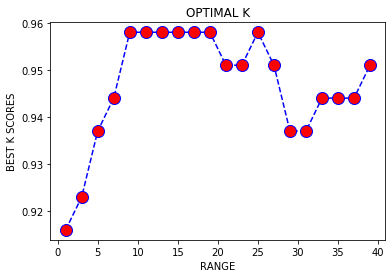

In [64]:
x=np.arange(1,41,2)
plt.plot(x,bestkscores,linestyle='dashed',color='blue',marker='o',markersize=12,markerfacecolor='red')
plt.title('OPTIMAL K')
plt.xlabel('RANGE')
plt.ylabel('BEST K SCORES')
plt.show()


In [ ]:
# WE CAN CHOOSE EITHER BETWEEN 20 and 25

In [62]:
# NOW LET US USE SKLEARN INBUILT CLASSIFIER AND CHECK FOR 25 K VALUE

In [63]:
clf=KNeighborsClassifier(n_neighbors=25)
clf.fit(X_train,Y_train)
yipred=clf.predict(X_test)

In [65]:
score=accuracy_score(Y_test,yipred)

In [66]:
score

0.958041958041958

In [67]:
# THIS SCORE IS BETTER THAN THE SCORE WHICH WE HAD BUILT LET US BUILD CONFUSION MATRIX AND CLASSFICATION REPORT FOR THIS 

In [68]:
from sklearn.metrics import confusion_matrix,classification_report

In [70]:
print(classification_report(Y_test,yipred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        53
           1       0.96      0.98      0.97        90

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143



In [71]:
print(confusion_matrix(Y_test,yipred))

[[49  4]
 [ 2 88]]


In [72]:
# SEEMS LIKE WE HAVE ONLY 6 INCORRECT ....